<a href="https://colab.research.google.com/github/Nadda1004/Intro_Machine_learning/blob/main/W3_D4_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members:**
* Nada ALzahrani
* Shaima Alamri
* Afrah Alharbi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>

### Data
- [Dog & Horse](https://github.com/gumdropsteve/datasets/blob/master/dog_or_horse.csv)
- [Seattle Rain](https://github.com/gumdropsteve/datasets/blob/master/seattle_weather_1948-2017.csv)


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
98,44.0,107.0,0.0,dog
120,45.0,174.0,1.0,horse
144,62.0,145.0,1.0,horse


In [3]:
# create x and y sets
x = df_dh[['height','weight']]
y = df_dh.target

In [4]:
# Scale Data
ss = StandardScaler()
x_ss = ss.fit_transform(x)

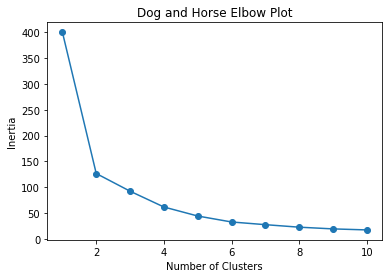

In [5]:
# Create Elbow Plot
inertia_ls = [] # save inertia values
for k in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(x_ss) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Dog and Horse Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

* **The best values of K as shown in the graph is 2**

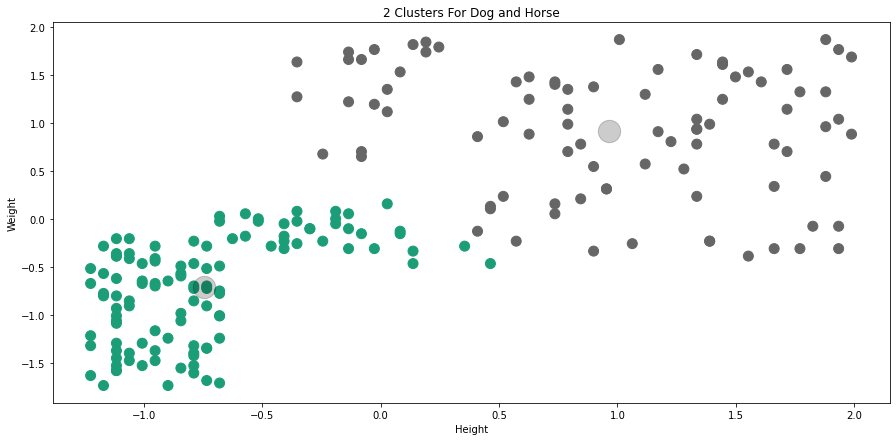

In [6]:
# Apply KMeans and Plot KMeans Results and Actual Results
km = KMeans(n_clusters=2)
km.fit(x_ss)
preds = km.labels_

y_kmm = km.predict(x_ss)
plt.figure(figsize=(15,7))
plt.scatter(x_ss[:, 0], x_ss[:, 1],c=y_kmm, s=100, cmap='Dark2')
plt.title('2 Clusters For Dog and Horse')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.2)
plt.xlabel("Height")
plt.ylabel("Weight");

In [7]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y, preds)

0.935

#### Seattle Weather KMeans Challenge

In [8]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
2787,1955-08-19,0.00,65,55,False
6131,1964-10-14,0.23,60,49,True
22973,2010-11-24,0.00,29,14,False


In [9]:
df_sea.isnull().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [10]:
# since prcp and rain has 3 null values we will fill those values with the mean
df_sea.prcp = df_sea.prcp.fillna(df_sea.prcp.mean())
df_sea.rain = df_sea.rain.fillna(df_sea.rain.mean())

In [11]:
# to make sure the data is filled
df_sea.isnull().sum()

ds      0
prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

In [12]:
# map the target values from True and False to 0 and 1 
df_sea.rain = df_sea.rain.astype(int)
df_sea.rain.value_counts()

0    14651
1    10900
Name: rain, dtype: int64

In [13]:
# create x and y
x = df_sea[['prcp' ,	'tmax' ,	'tmin']]
y = df_sea.rain

In [14]:
# Scale Data
ss = StandardScaler()
x_ss = ss.fit_transform(x)

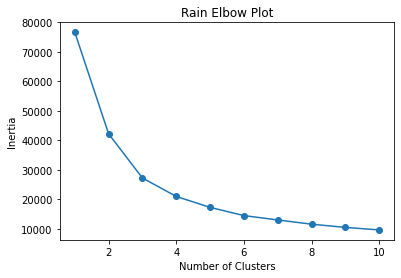

In [15]:
# Create Elbow Plot
inertia_ls = [] # save inertia values
for k in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(x_ss) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Rain Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

* **The best values of K as shown in the graph is 2 or 3**

* 2 Clusters

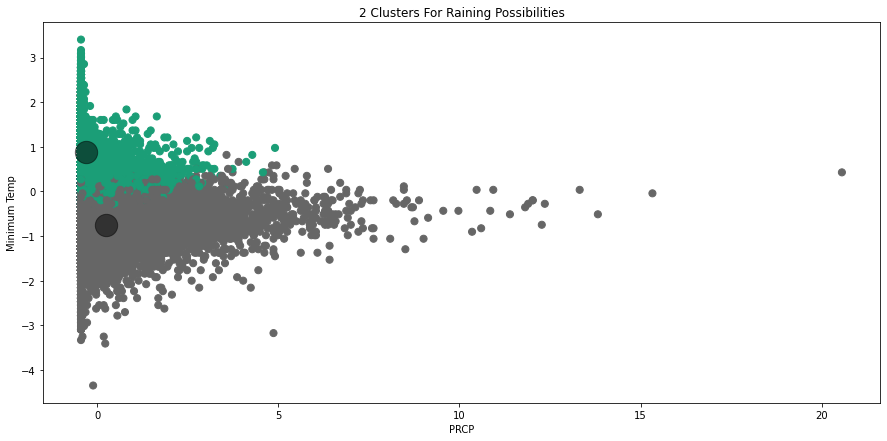

In [16]:
# Apply KMeans and Plot KMeans Results and Actual Results
km = KMeans(n_clusters=2)
km.fit(x_ss)
preds = km.labels_

y_kmm = km.predict(x_ss)
plt.figure(figsize=(15,7))
# x = prcp , y = tmin
plt.scatter(x = x_ss[:, 0], y = x_ss[:, 1],c=y_kmm, s=50, cmap='Dark2')
plt.title('2 Clusters For Raining Possibilities')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)
plt.xlabel("PRCP")
plt.ylabel("Minimum Temp");

In [17]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y , preds)

0.6631051622245705

* We tried to do 3 clusters so we can comapre it to 2 clusters

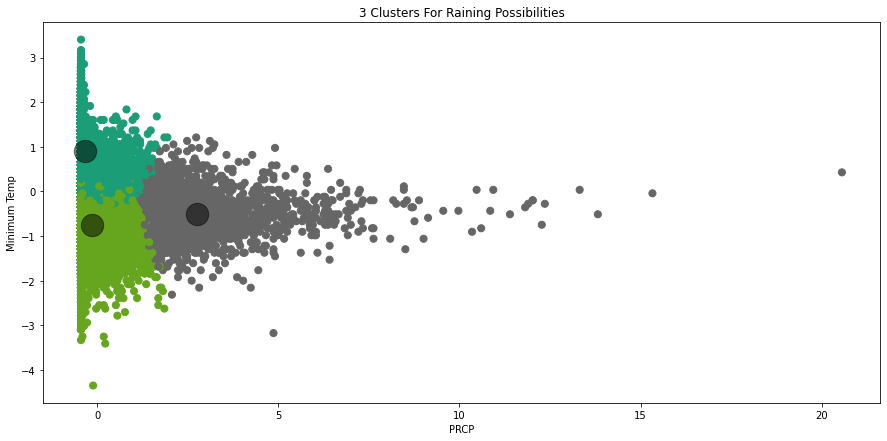

In [18]:
# Apply KMeans and Plot KMeans Results and Actual Results
km= KMeans(n_clusters=3)
km.fit(x_ss)
preds= km.labels_

y_kmm = km.predict(x_ss)
plt.figure(figsize=(15,7))

plt.scatter(x_ss[:, 0], x_ss[:, 1], c=y_kmm, s=50, cmap='Dark2')
plt.title('3 Clusters For Raining Possibilities')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)
plt.xlabel("PRCP")
plt.ylabel("Minimum Temp");

In [19]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y , preds)

0.5827560565144221

#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

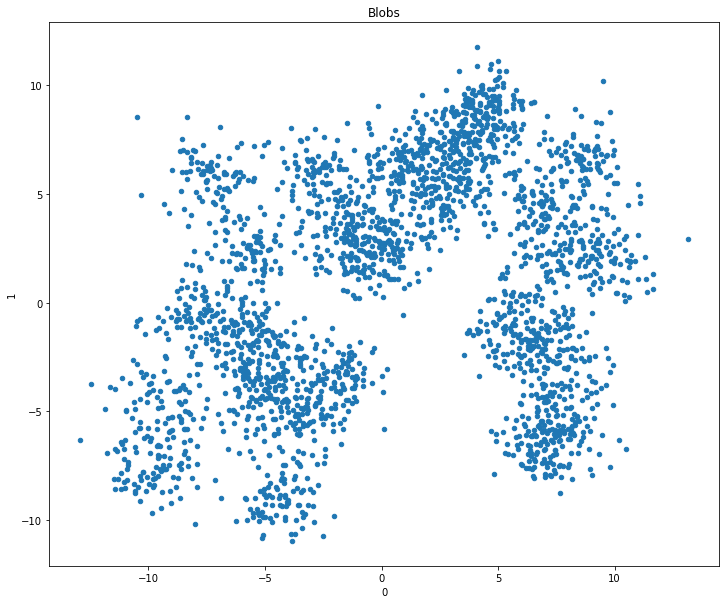

In [20]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [21]:
df_blob.head()

,0,1
0,6.631675,-1.565833
1,5.615382,-3.333810
2,-5.028471,-8.561434
3,6.109419,3.653692
4,-8.422310,-0.069677


In [22]:
df_blob.shape

(2515, 2)

In [23]:
# Scale Data
ss = StandardScaler()
df_ss = ss.fit_transform(df_blob)

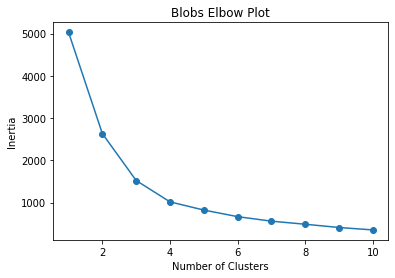

In [24]:
# Create Elbow Plot
inertia_ls = [] # save inertia values
for k in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(df_ss) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Blobs Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

* **The best values of K as shown in the graph is 3**

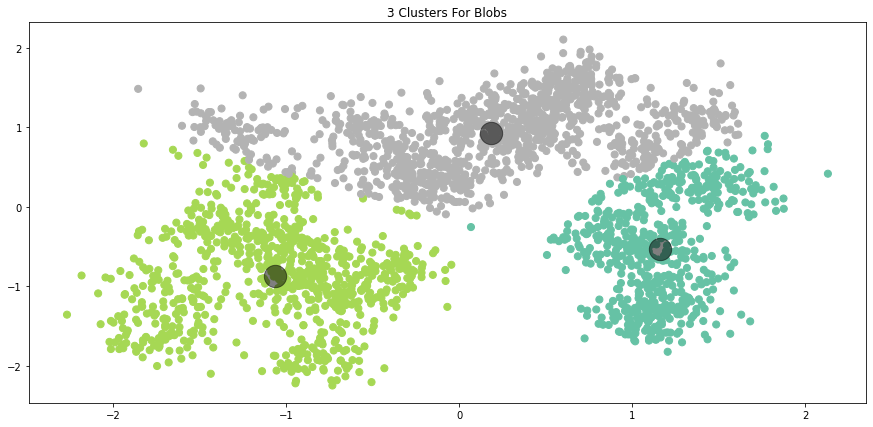

In [25]:
# Apply KMeans and Plot KMeans Results and Actual Results
km= KMeans(n_clusters=3)
km.fit(df_ss)
preds= km.labels_

y_kmm = km.predict(df_ss)
plt.figure(figsize=(15,7))

plt.scatter(df_ss[:, 0], df_ss[:, 1], c=y_kmm, s=50, cmap='Set2')
plt.title('3 Clusters For Blobs')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);